# UCCB3224 Data Mining Techniques

### Group 11
Group Members:
- Chia Kee Ling, 18065706 (P3)
- Choo Yong Quan, 1803979 (P3)
- Chow Shin Jie, 1804372 (P3)
- Ong Zi Yan, 1804375 (P3)
- Choy Weng Nam, 1605334 (P1)

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Collection

In [13]:
df = pd.read_csv('dataset.csv',na_values='?')

## Data Exploration

In [14]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [16]:
df.shape

(90, 18)

In [17]:
df.isnull()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [55]:
df['LandingPad'].fillna(value="None", inplace=True)
df['LandingPad']

0                         None
1                         None
2                         None
3                         None
4                         None
                ...           
85    5e9e3032383ecb6bb234e7ca
86    5e9e3032383ecb6bb234e7ca
87    5e9e3032383ecb6bb234e7ca
88    5e9e3033383ecbb9e534e7cc
89    5e9e3032383ecb6bb234e7ca
Name: LandingPad, Length: 90, dtype: object

## Numerical Feature Analysis

In [19]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [11]:
df.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


In [20]:
num = df[['FlightNumber','PayloadMass','Flights','GridFins','Reused','Legs','Block','ReusedCount','Longitude','Latitude']]
num

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude
0,1,6104.959412,1,False,False,False,1.0,0,-80.577366,28.561857
1,2,525.000000,1,False,False,False,1.0,0,-80.577366,28.561857
2,3,677.000000,1,False,False,False,1.0,0,-80.577366,28.561857
3,4,500.000000,1,False,False,False,1.0,0,-120.610829,34.632093
4,5,3170.000000,1,False,False,False,1.0,0,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,-80.603956,28.608058
86,87,15400.000000,3,True,True,True,5.0,2,-80.603956,28.608058
87,88,15400.000000,6,True,True,True,5.0,5,-80.603956,28.608058
88,89,15400.000000,3,True,True,True,5.0,2,-80.577366,28.561857


## Categorical Feature Analysis

In [56]:
cat = df[['Date','BoosterVersion','Orbit','LaunchSite','Outcome','LandingPad','Serial']]
cat

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,LandingPad,Serial
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,None,B0003
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,None,B0005
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,None,B0007
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,None,B1003
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,None,B1004
...,...,...,...,...,...,...,...
85,2020-09-03,Falcon 9,VLEO,KSC LC 39A,True ASDS,5e9e3032383ecb6bb234e7ca,B1060
86,2020-10-06,Falcon 9,VLEO,KSC LC 39A,True ASDS,5e9e3032383ecb6bb234e7ca,B1058
87,2020-10-18,Falcon 9,VLEO,KSC LC 39A,True ASDS,5e9e3032383ecb6bb234e7ca,B1051
88,2020-10-24,Falcon 9,VLEO,CCAFS SLC 40,True ASDS,5e9e3033383ecbb9e534e7cc,B1060


In [57]:
cat.value_counts()

Date        BoosterVersion  Orbit  LaunchSite    Outcome    LandingPad                Serial
2010-06-04  Falcon 9        LEO    CCAFS SLC 40  None None  None                      B0003     1
2019-08-06  Falcon 9        GTO    CCAFS SLC 40  None None  None                      B1047     1
2019-06-12  Falcon 9        SSO    VAFB SLC 4E   True RTLS  5e9e3032383ecb554034e7c9  B1051     1
2019-05-24  Falcon 9        VLEO   CCAFS SLC 40  True ASDS  5e9e3032383ecb6bb234e7ca  B1049     1
2019-05-04  Falcon 9        ISS    CCAFS SLC 40  True ASDS  5e9e3032383ecb6bb234e7ca  B1056     1
                                                                                               ..
2017-03-30  Falcon 9        GTO    KSC LC 39A    True ASDS  5e9e3032383ecb6bb234e7ca  B1021     1
2017-03-16  Falcon 9        GTO    KSC LC 39A    None None  None                      B1030     1
2017-02-19  Falcon 9        ISS    KSC LC 39A    True RTLS  5e9e3032383ecb267a34e7c7  B1031     1
2017-01-14  Falcon 9     

In [58]:
cat['LandingPad'].fillna(value='None',inplace=True)
cat['LandingPad']

0                         None
1                         None
2                         None
3                         None
4                         None
                ...           
85    5e9e3032383ecb6bb234e7ca
86    5e9e3032383ecb6bb234e7ca
87    5e9e3032383ecb6bb234e7ca
88    5e9e3033383ecbb9e534e7cc
89    5e9e3032383ecb6bb234e7ca
Name: LandingPad, Length: 90, dtype: object

Since LandingPad contains 26 null values, dropping it may reduce the size of the dataset. Thus, we decide to replace those null values with 'None' which indicates not applicable.

In [59]:
cat.nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
LandingPad         6
Serial            53
dtype: int64

In [60]:
for column in cat:
    print('%s\n%s\n' % (column, cat[column].value_counts()))

Date
2010-06-04    1
2019-08-06    1
2019-06-12    1
2019-05-24    1
2019-05-04    1
             ..
2017-03-30    1
2017-03-16    1
2017-02-19    1
2017-01-14    1
2020-11-05    1
Name: Date, Length: 90, dtype: int64

BoosterVersion
Falcon 9    90
Name: BoosterVersion, dtype: int64

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

LandingPad
5e9e3032383ecb6bb234e7ca    35
None                        26
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

Serial
B1049    6
B1051    5
B1059    4


From here we can noticed that the BoosterVersion has only 1 unique value which is 'Falcon 9'. Thus, this features might not be useful in the classification task later. 

<AxesSubplot:xlabel='LandingPad'>

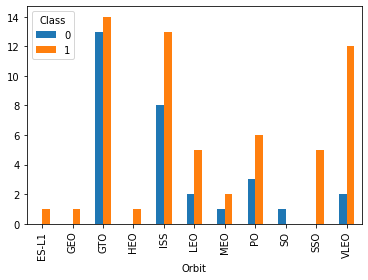

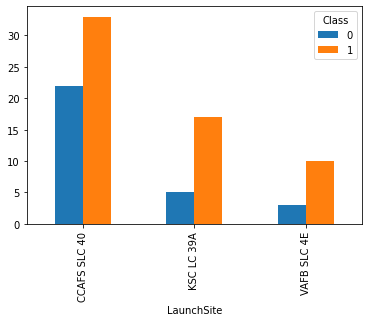

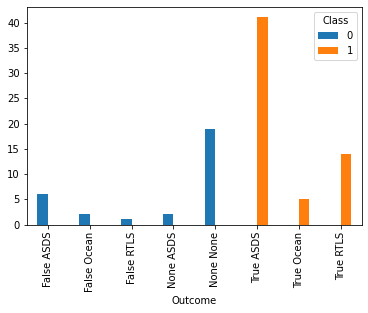

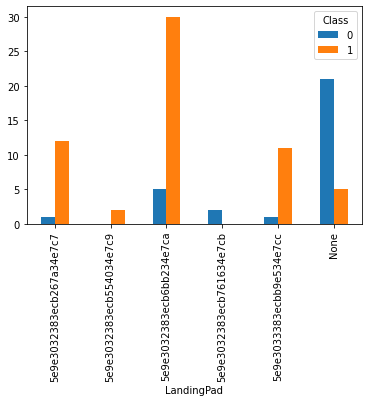

In [62]:
df.groupby(['Orbit','Class']).size().unstack().plot(kind='bar')
df.groupby(['LaunchSite','Class']).size().unstack().plot(kind='bar')
df.groupby(['Outcome','Class']).size().unstack().plot(kind='bar')
df.groupby(['LandingPad','Class']).size().unstack().plot(kind='bar')

Since Date consists of very large number of unique value counts, we consider to plot its relation with the class by performing manual grouping (Seperate by years or months). 

<AxesSubplot:xlabel='Date'>

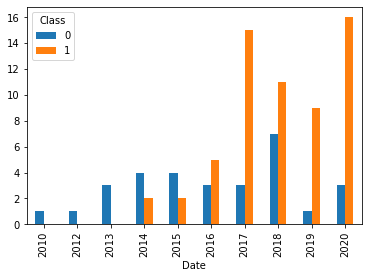

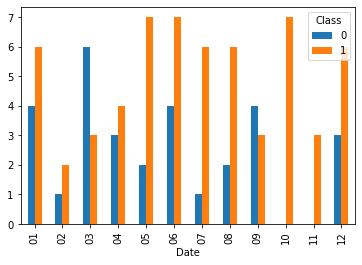

In [74]:
year = []
month = []
for i in df["Date"]:
    year.append(i.split("-")[0])
    month.append(i.split("-")[1])

df1 = df.copy()
df1["Date"] = year
df1.groupby(['Date','Class']).size().unstack().plot(kind='bar')

df2 = df.copy()
df2["Date"] = month
df2.groupby(['Date','Class']).size().unstack().plot(kind='bar')